<a href="https://colab.research.google.com/github/jessicamadridmejia/EIA-Diplomado-IA-Modulo1/blob/master/AI_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métodos de Busqueda a ciegas y heurísticos

In [0]:
import pydot
from IPython.display import Image, display
import queue
import numpy as np

## Clase Node, para representar los nodos del árbol de búsqueda

Esta clase, es una clase general para represetar el problema y a la vez los nodos de un árbol.

Para un problema específico se creará una clase que herede de esta.

Tiene como atributos o propiedades:
-  state: estado del nodo, que en dependencia del problema debe tener una representación específica
- value: este atributo puede servir para darle un valor(id) que identifique a cada nodo
- children: es un arreglo de los nodos hijos,

In [0]:
class Node ():
  def __init__(self, state,value,operators, operator=None, parent=None,objective=None):
    self.state= state
    self.value = value
    self.children = []
    self.parent=parent
    self.operator=operator
    self.operators=operators
    self.objective=objective

    
  def add_child(self, value, state, operator):
    node=type(self)(value=value, state=state, operator=operator,parent=self, operators=self.operators)
    self.children.append(node)
    return node

  #Devuelve todos los estados según los operadores aplicados
  def getchildrens(self):
    return [
        self.getState(i) 
          if not self.repeatStatePath(self.getState(i)) 
            else None for i, op in enumerate(operators)]
    
  def getState(self, index):
    pass
  
  def __eq__(self, other):
    return self.state == other.state
 
  def __lt__(self, other):
    return self.f() < other.f()
   
  
  def repeatStatePath(self, state):
      n=self
      while n is not None and n.state!=state:
          n=n.parent
      return n is not None
    
  def pathObjective(self):
      n=self
      result=[]
      while n is not None:
          result.append(n)
          n=n.parent
      return result
    
  def printPath(self):
      stack=self.pathObjective()
      while len(stack)!=0:
          node=stack.pop()
          if node.operator is not None:
              print(f' {operators[node.operator]}-{node.state}')
          else:
              print(f' {node.state}')
  
  def heuristic(self):
    return 0
  
  def cost(self):
    return 1
  
  def f(self):
    return self.cost()+self.heuristic()

## Búsqueda primero a lo ancho

In [0]:
def breadthFirst(root, startState, endState):
    pq=queue.Queue()
    pq.put(root)
    while not pq.empty():
      node=pq.get()
      children=node.getchildrens()
      for i,child in enumerate(children):
        if child is not None:
          newChild=node.add_child(value=node.value+'-'+str(i), state=child, operator=i)
          pq.put(newChild)
          if endState==child:
            return (root, newChild) 

## Búsqueda primero en profundidad

In [0]:
def dephFirst(root, startState, endState):
    pq=[]
    pq.append(root)
    while len(pq)>0:
      node=pq.pop()
      children=node.getchildrens()
      temp=[]
      for i,child in enumerate(children):
        if child is not None:
          newChild=node.add_child(value=node.value+'-'+str(i), state=child, operator=i)
          temp.append(newChild)
          if endState==child:
            return (root, newChild) 
      #Adicionar los hijos en forma inversa para que salga primero el primero que se adicionó
      temp.reverse()
      for e in temp:
        pq.append(e)

## Búsqueda primero el mejor (basado en heurística)

In [0]:
def bestFirst(root, startState, endState):
    pq=queue.PriorityQueue()
    pq.put((root.heuristic(),root))
    while not pq.empty():
      node=pq.get()[1]
      children=node.getchildrens()
      for i,child in enumerate(children):
        if child is not None:
           #newChild=type(node)(value=str(i), state=child, operator=i, parent=node, operators=node.operators)
          newChild=node.add_child(value=node.value+'-'+str(i), state=child, operator=i)
          pq.put((newChild.heuristic(),newChild))
          if endState==child:
            return (root, newChild)  

## Búsqueda A* (basado en costo y heurística)

In [0]:
def aAster(root, startState, endState):
    pq=queue.PriorityQueue()
    pq.put((root.f(), root))
    while not pq.empty():
      node=pq.get()[1]
      children=node.getchildrens()
      for i,child in enumerate(children):
        if child is not None:
          #newChild=type(node)(value=str(i), state=child, operator=i, parent=node, operators=node.operators)
          newChild=node.add_child(value=str(i), state=child, operator=i)
          pq.put(newChild.f(),newChild)
          if endState==child:
            return newChild    

## Función para dibujar el árbol de búsqueda con el camino solución

In [0]:
def draw(root,path):
    graph = pydot.Dot(graph_type='graph')
    nodeGraph=pydot.Node(str(root.state)+"-"+str(0),label=str(root.state),shape ="circle", style="filled", fillcolor="red")
    graph.add_node(nodeGraph)
    path.pop()
    return drawTreeRec(root,nodeGraph,graph,0,path.pop(),path)
    
def drawTreeRec(root,rootGraph,graph,i,topPath,path):
    if root is not None:
      children=root.children
      for j,child in enumerate(children):
        i=i+1
        color="white"
        if topPath.value==child.value:
          if len(path)>0:topPath=path.pop()
          color='red'
        if child.heuristic()==0: 
          h="" 
        else: 
          h=str(child.heuristic())
        c=pydot.Node(child.value,label=str(child.state)+"-"+h, shape ="circle", style="filled", fillcolor=color)
        graph.add_node(c)
        graph.add_edge(pydot.Edge(rootGraph, c, texlbl='t_1', label=str(child.operator)))
        graph=drawTreeRec(child,c,graph,i,topPath,path)  # recursive call
      return graph
    else:
      return graph
    

## Ejemplos
### Ejemplo de las jarras
Se tiene una jarra de 4L y una de 3L, las jarras no tienen medidas ni forma de medir la cantidad, sólo se puede saber la medida a la máxima capacidad.
Se cuenta con un vertedero y una llave de agua. Las jarras se pueden llenar hasta la máxima capacidad, vaciar o trasvasar de una a otra.
Se quiere obtener 2L en la jarra de 4L.

Teniendo en cuenta este problema, se puede definir el estado como:
**(cantidad jarra de 3L, cantidad jarra de 4L)**

Y los operadores como:

>0-  llenar jarra de 3 litros

>1-  llenar jarra de 4 litros

>2-  vaciar jarra de 3 litros

>3-  vaciar jarra de 4 litros

>4-  trasvasar de 4L a 3L

>5-  trasvasar de 3L a 4L



In [0]:
class Jarra(Node):
  
  def getState(self, index):
    state=self.state
    nextState=None
    if index==0: 
      if state[0]<3: 
        nextState=[3,state[1]] 
      else:
        nextState=None
    elif index==1: 
      if state[1]<4: 
        nextState=[state[0],4]
      else:
        nextState=None
    elif index==2: 
      if state[0]>0: 
        nextState=[0,state[1]] 
      else:
        nextState=None
    elif index==3: 
      if state[1]>0: 
        nextState=[state[0],0] 
      else:
        nextState=None
    elif index==4: nextState=self.trasvasar3L4L(state)
    elif index==5: nextState=self.trasvasar4L3L(state)
    return nextState if state!=nextState else None

  def trasvasar4L3L(self, state):
    t=min(3-state[0],state[1])
    return [state[0]+t,state[1]-t]
  
  def trasvasar3L4L(self, state):
    t=min(state[0],4-state[1])
    return [state[0]-t,state[1]+t]
  
  def heuristic(self):
    r1=abs(objective.state[0]-self.state[0])
    r2=abs(objective.state[1]-self.state[1])
    return r2+r1   
    

Se definen además las variables de:

*   operadores
*   estado inicial
*   estado final



In [0]:
operators=['0- llenar jarra de 3 litros','1- llenar jarra de 4 litros','2- vaciar jarra de 3 litros',
             '3- vaciar jarra de 4 litros','4- trasvasar de 4-3','5- trasvasar de 3-4']
initState=[0,0]
endState=[0,2]

Para probar los algoritmos se crea un objeto de tipo Jarra y se ejecutan los métodos de búsqueda.

Se busca el camino solución.

Se dibuja el árbol.

 [0, 0]
 0- llenar jarra de 3 litros-[3, 0]
 4- trasvasar de 4-3-[0, 3]
 0- llenar jarra de 3 litros-[3, 3]
 4- trasvasar de 4-3-[2, 4]
 3- vaciar jarra de 4 litros-[2, 0]
 4- trasvasar de 4-3-[0, 2]


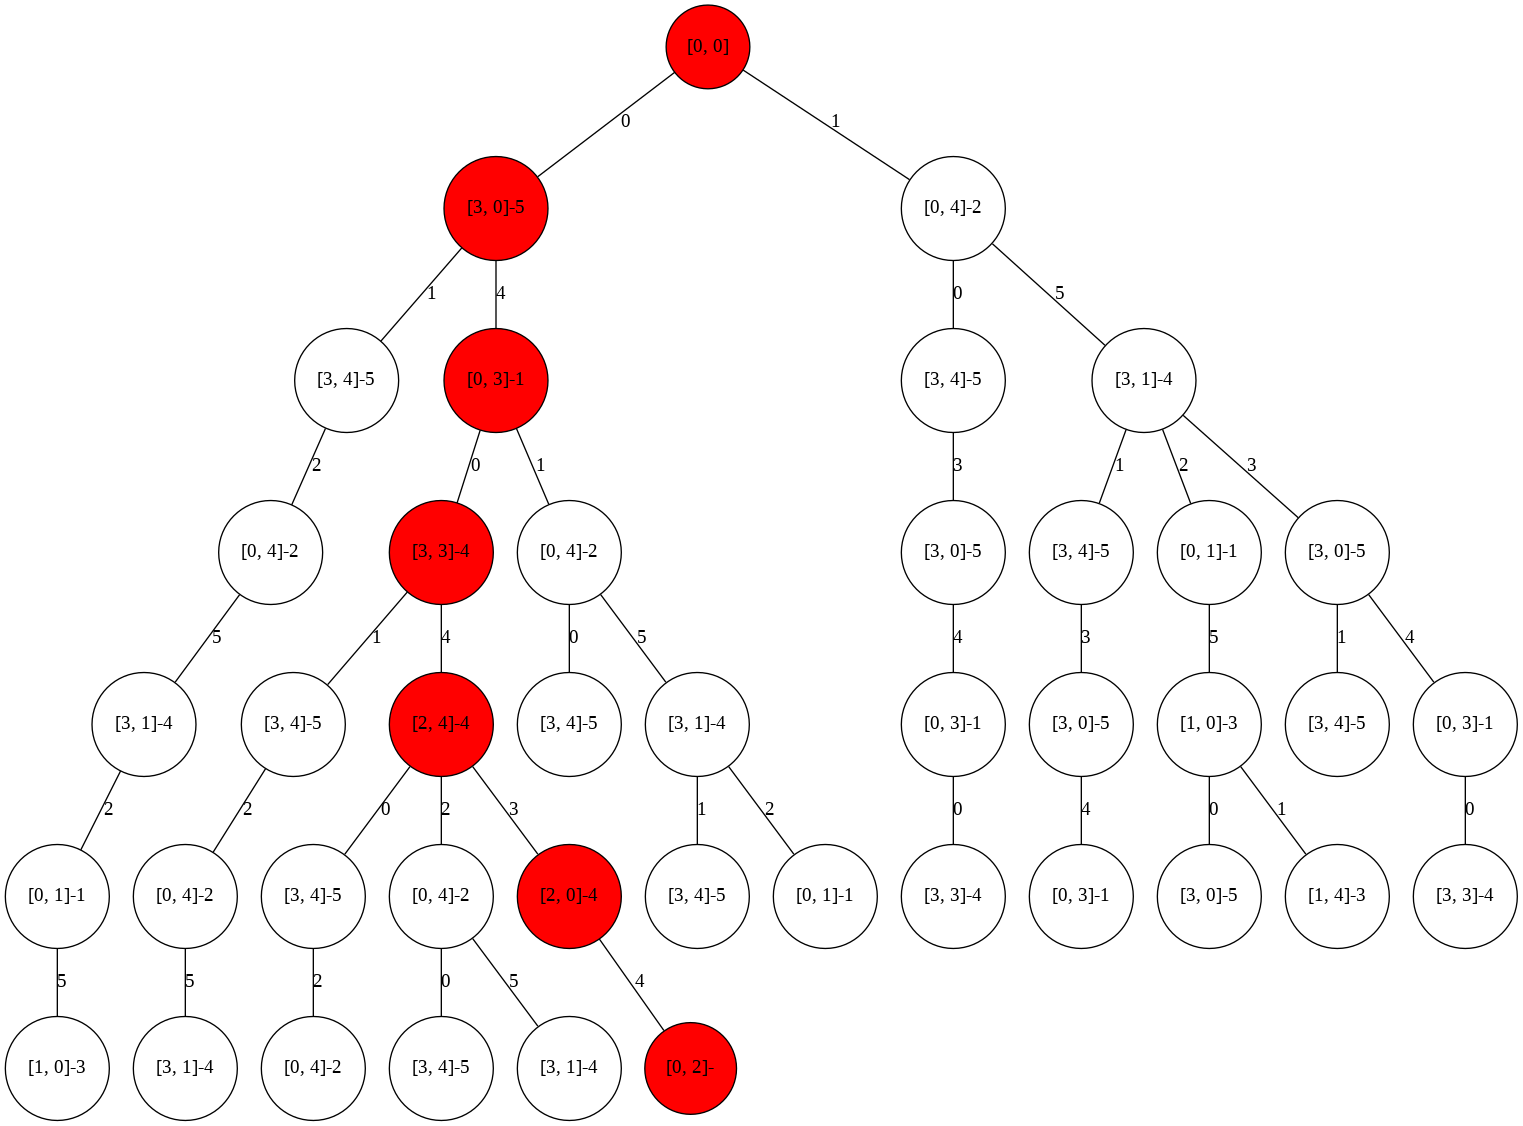

In [0]:
jarra=Jarra(value="inicio",state=initState,operators=operators)
(tree, objective)=breadthFirst(jarra,initState,endState)
path=objective.pathObjective()
objective.printPath()
graph=draw(tree, path)
tree_image = Image(graph.create_png(), width=800, height=600)
display(tree_image)

 [0, 0]
 0- llenar jarra de 3 litros-[3, 0]
 1- llenar jarra de 4 litros-[3, 4]
 2- vaciar jarra de 3 litros-[0, 4]
 5- trasvasar de 3-4-[3, 1]
 2- vaciar jarra de 3 litros-[0, 1]
 5- trasvasar de 3-4-[1, 0]
 1- llenar jarra de 4 litros-[1, 4]
 5- trasvasar de 3-4-[3, 2]
 2- vaciar jarra de 3 litros-[0, 2]


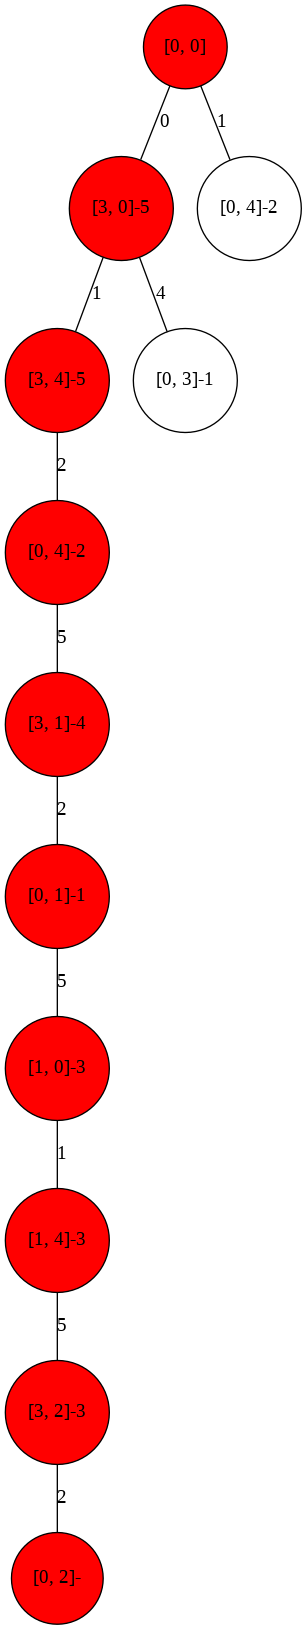

In [0]:
jarra=Jarra(value="inicio",state=initState,operators=operators)
(tree, objective)=dephFirst(jarra,initState,endState)
path=objective.pathObjective()
objective.printPath()
graph=draw(tree, path)
tree_image = Image(graph.create_png(), width=300, height=600)
display(tree_image)

 [0, 0]
 1- llenar jarra de 4 litros-[0, 4]
 5- trasvasar de 3-4-[3, 1]
 2- vaciar jarra de 3 litros-[0, 1]
 5- trasvasar de 3-4-[1, 0]
 1- llenar jarra de 4 litros-[1, 4]
 5- trasvasar de 3-4-[3, 2]
 2- vaciar jarra de 3 litros-[0, 2]


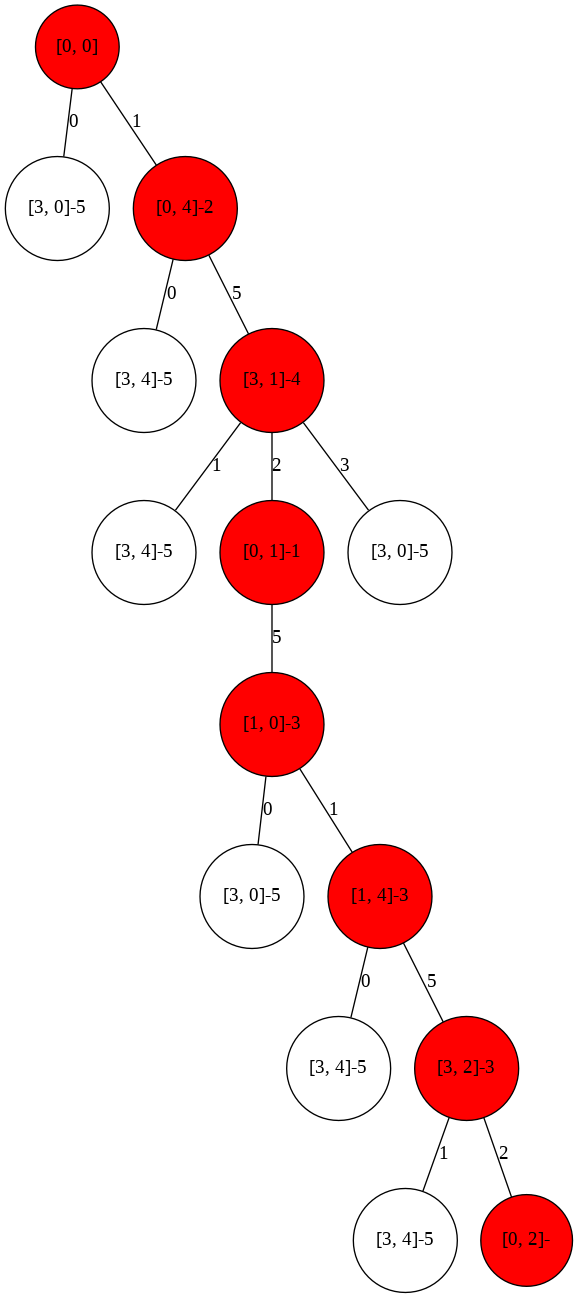

In [0]:
jarra=Jarra(value="inicio",state=initState,operators=operators)
(tree, objective)=bestFirst(jarra,initState,endState)
path=objective.pathObjective()
objective.printPath()
graph=draw(tree, path)
tree_image = Image(graph.create_png(), width=500, height=600)
display(tree_image)